# Detector modeling

In [1]:
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import sys
codefolder = '../../../../crispy'
if codefolder not in sys.path: sys.path.append(codefolder)
from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
from crispy.params import Params
codefolder = '../../../crispy'
par = Params(codefolder)


crispy - INFO - Read data from HDU 1 of ../../../crispy/OS5/os5_spc_100_targetstar_IFS.fits


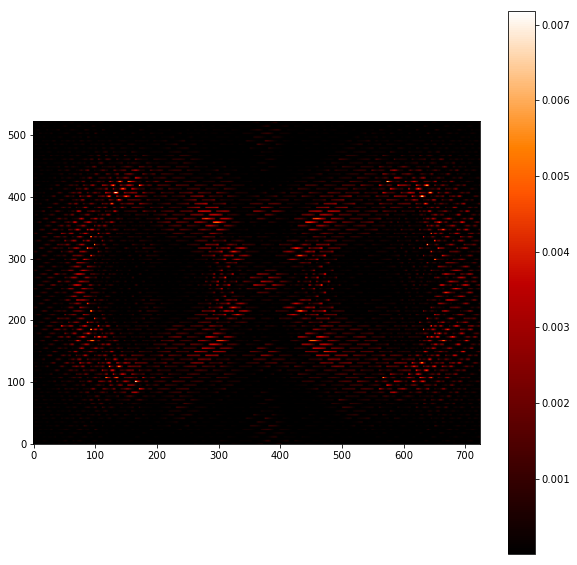

In [61]:
from crispy.tools.image import Image

img = Image('../../../crispy/OS5/os5_spc_100_targetstar_IFS.fits')
img.data = img.data[250:-250,150:-150]

plt.figure(figsize=(10,10))
plt.imshow(img.data, cmap='gist_heat')
plt.colorbar()
plt.show()

In [64]:
from crispy.tools.detector import readDetector
par.EMGain=200
par.EMbias=100
par.threshold=5
par.dark=2e-4
par.CIC=1.2e-2
par.Nreads = 1000
par.RN=20
par.poisson=True
par.EMStats=True
par.PCmode=True
par.makeHeader()
frame=np.zeros(img.data.shape)
dark = np.zeros(img.data.shape)
for i in range(par.Nreads):
    #newread = readDetector(par,Image(data=dark),inttime=333)
    newread = readDetector(par,img,inttime=100)
    frame += newread
print(np.std(frame))
#vals = readDetector(par,img,10)
Image(data=frame,header=par.hdr).write(par.exportDir+"/detectorTestsWorseNoise.fits")
# plt.figure(figsize=(10,10))
# plt.hist(frame.reshape(-1)*par.EMGain,bins=100)
# import pylab as pl
# pl.gca().set_yscale("log")
# plt.show()

7.40907005014
crispy - INFO - Writing data to ../../../crispy/SimResults/detectorTestsWorseNoise.fits


In [4]:
par.hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  108 / # lenslets across array                        
PITCH   =             0.000174 / Lenslet pitch (meters)                         
INTERLAC=                    2 / Interlacing                                    
PHILENS =    26.565051177077

In [76]:
from scipy.interpolate import interp1d

par.QE = "QE_CCD201.txt"
loadQE = np.loadtxt(par.codeRoot+"/"+par.QE)
QE = interp1d(loadQE[:,0].T,loadQE[:,1].T)
QE(840.)

array(0.449204683)